In [74]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import time
%matplotlib inline

In [75]:
# One building with one year data is extracted for demo
features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_features_re-selected' + '.csv')
targets = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_target_re-selected' + '.csv')

In [76]:
features.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,WindDirDegrees,WEEKDAY(timestamp) = 3,WEEKDAY(timestamp) = 6,WEEKDAY(timestamp) = 5,WEEKDAY(timestamp) = 4,WEEKDAY(timestamp) = 2,...,Dew PointC * seasonal_num / TemperatureC,Humidity / TemperatureC * Humidity / WindDirDegrees,Dew PointC * Humidity / WindDirDegrees,seasonal_num * seasonal_num / TemperatureC,Humidity * TemperatureC / seasonal_num,Dew PointC / seasonal_num * Humidity,seasonal_num / TemperatureC * WindDirDegrees / Dew PointC,seasonal_num * TemperatureC / Dew PointC,Humidity / TemperatureC * seasonal_num / Humidity,Humidity / WindDirDegrees * TemperatureC
0,1,3.9,100.0,3.9,330.0,1,0,0,0,0,...,1.000000,7.770008,1.181818,0.256410,390.0,390.0,21.696252,1.000000,0.256410,1.181818
1,1,4.4,93.0,3.3,340.0,1,0,0,0,0,...,0.750000,5.781417,0.902647,0.227273,409.2,306.9,23.415978,1.333333,0.227273,1.203529
2,1,3.9,100.0,3.9,320.0,1,0,0,0,0,...,1.000000,8.012821,1.218750,0.256410,390.0,390.0,21.038790,1.000000,0.256410,1.218750
3,1,3.3,97.0,2.8,320.0,1,0,0,0,0,...,0.848485,8.910038,0.848750,0.303030,320.1,271.6,34.632035,1.178571,0.303030,1.000312
4,1,3.3,97.0,2.8,320.0,1,0,0,0,0,...,0.848485,8.910038,0.848750,0.303030,320.1,271.6,34.632035,1.178571,0.303030,1.000312


In [77]:
targets.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


# RandomForrest feature importance selection

In [78]:
clf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [79]:
%store -r X_collinear_MI #read the features and labels data after filter method
%store -r y

no stored variable #read the features and labels data after filter method


In [80]:
X_collinear_MI.head()

,seasonal_num,TemperatureC,Humidity,WindDirDegrees,WEEKDAY(timestamp) = 3,WEEKDAY(timestamp) = 6,WEEKDAY(timestamp) = 5,WEEKDAY(timestamp) = 4,WEEKDAY(timestamp) = 1,WEEKDAY(timestamp) = 0,...,WindDirDegrees / Dew PointC,TemperatureC / WindDirDegrees,WindDirDegrees / seasonal_num,Humidity / WindDirDegrees,TemperatureC / seasonal_num,Dew PointC * TemperatureC,Humidity / Dew PointC * WindDirDegrees / Dew PointC,Humidity * Humidity / Dew PointC,Humidity * WindDirDegrees / TemperatureC,Humidity / TemperatureC * WindDirDegrees / TemperatureC
0,1,3.9,100.0,330.0,1,0,0,0,0,0,...,84.615385,0.011818,330.0,0.303030,3.9,15.21,2169.625247,2564.102564,8461.538462,2169.625247
1,1,4.4,93.0,340.0,1,0,0,0,0,0,...,103.030303,0.012941,340.0,0.273529,4.4,14.52,2903.581267,2620.909091,7186.363636,1633.264463
2,1,3.9,100.0,320.0,1,0,0,0,0,0,...,82.051282,0.012188,320.0,0.312500,3.9,15.21,2103.879027,2564.102564,8205.128205,2103.879027
3,1,3.3,97.0,320.0,1,0,0,0,0,0,...,114.285714,0.010313,320.0,0.303125,3.3,9.24,3959.183673,3360.357143,9406.060606,2850.321396
4,1,3.3,97.0,320.0,1,0,0,0,0,0,...,114.285714,0.010313,320.0,0.303125,3.3,9.24,3959.183673,3360.357143,9406.060606,2850.321396


In [81]:
y.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


In [82]:
start = time.time()

# Train the regressor exhaustively with all features
clf.fit(X_collinear_MI, y)

end = time.time()
elapsed = end - start 
print('Time for training all features:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

Time for training all features:00:00:01


In [83]:
# Print the name and importance of each feature
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_collinear_MI.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [84]:
feature_importances.head(10)

,importance
TemperatureC,0.125984
WEEKDAY(timestamp) = 6,0.106795
WEEKDAY(timestamp) = 5,0.103629
Humidity,0.100507
HOUR(timestamp) is unknown,0.035880
Dew PointC * TemperatureC,0.034568
Humidity / TemperatureC,0.031293
Humidity * Humidity / Dew PointC,0.030946
TemperatureC / seasonal_num,0.030534
Humidity / WindDirDegrees,0.029170


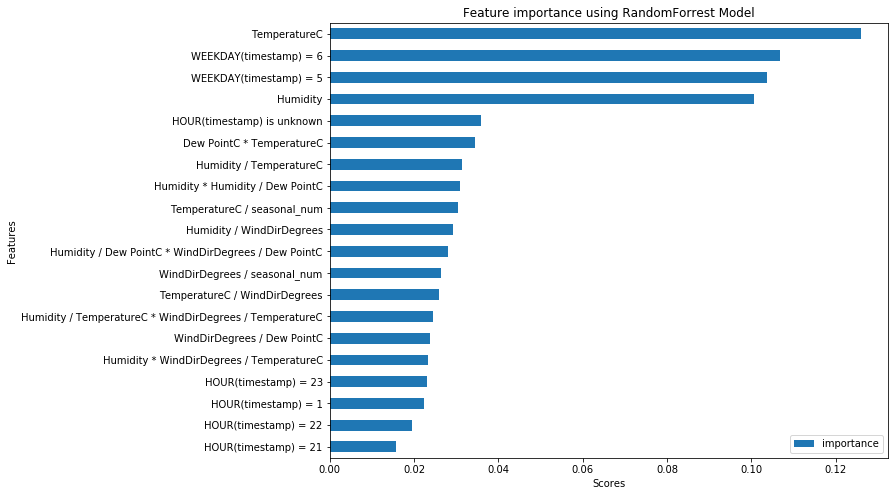

In [85]:
# plot 20 features with the largets scores
fig = feature_importances.nlargest(20, columns='importance').sort_values('importance', ascending=True).plot.barh(
    figsize=(10,8), use_index=True)
fig.set_ylabel("Features")
fig.set_xlabel("Scores")
plt.title("Feature importance using RandomForrest Model")
plt.show()

# Cumulative importances VS number of features

In [86]:
# Summing all feature importance
tot = sum(feature_importances['importance'].values)
tot

1.0

In [87]:
# Importances on first five features
feature_importances_100 = [(i/tot)*100 for i in sorted(feature_importances['importance'].values, reverse=True)] 
print(feature_importances_100[0:5])

[12.598442211294836, 10.679513920837216, 10.362922931705995, 10.05067808482767, 3.588013788521853]


In [88]:
# Cumulative feature importance
feature_importances_cum = np.cumsum(feature_importances_100)
feature_importances_cum

array([ 12.59844221,  23.27795613,  33.64087906,  43.69155715,
        47.27957094,  50.73637365,  53.86567746,  56.96028953,
        60.01364767,  62.93065393,  65.74119043,  68.37359179,
        70.97144407,  73.43278452,  75.80644247,  78.12659333,
        80.44123451,  82.67138615,  84.61304981,  86.18551726,
        87.61804716,  88.9930389 ,  90.21685762,  91.27777857,
        92.23661865,  93.13654028,  93.90170946,  94.65051828,
        95.38977181,  96.08104785,  96.74237991,  97.34244331,
        97.87509548,  98.38481322,  98.78593824,  99.17189614,
        99.52904016,  99.73246139,  99.92720072, 100.        ])

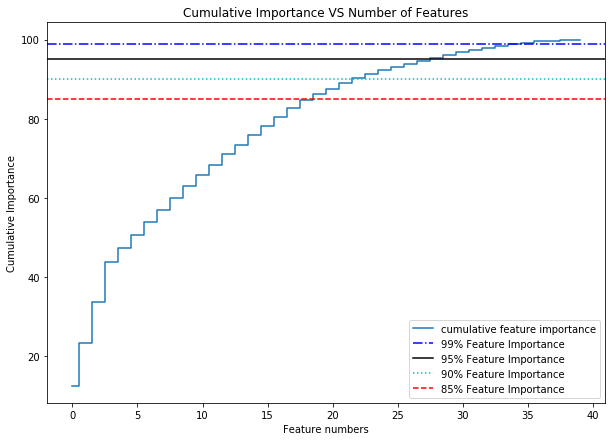

In [89]:
x_values = list(range(len(feature_importances)))

# PLOT OUT THE FEATURE IMPORTANCE SUPERIMPOSED 
plt.figure(figsize=(10, 7))
plt.step(x_values, feature_importances_cum, where='mid',label='cumulative feature importance')
plt.title('Cumulative Importance VS Number of Features')
plt.ylabel('Cumulative Importance')
plt.xlabel('Feature numbers')
plt.axhline(y = 99, color='b', linestyle='-.', label = '99% Feature Importance')
plt.axhline(y = 95, color='k', linestyle='-', label = '95% Feature Importance')
plt.axhline(y = 90, color='c', linestyle=':', label = '90% Feature Importance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Feature Importance')
plt.legend(loc='best')
plt.show()

In [90]:
FeatureIndex = [len(feature_importances), np.argmax(feature_importances_cum > 99) + 1, 
                      np.argmax(feature_importances_cum > 95) + 1, np.argmax(feature_importances_cum > 90) + 1, 
                      np.argmax(feature_importances_cum >= 85) + 1]

In [91]:
FeatureIndex

[40, 36, 29, 23, 20]

In [92]:
print(str(FeatureIndex[0]) + ' features are required to maitain 100% importance\n' +
      str(FeatureIndex[1]) + ' features are required to maitain 99% importance\n' +
      str(FeatureIndex[2]) + ' features are required to maitain 95% importance\n' +
      str(FeatureIndex[3]) + ' features are required to maitain 90% importance\n' +
      str(FeatureIndex[4]) + ' features are required to maitain 85% importance\n')

40 features are required to maitain 100% importance
36 features are required to maitain 99% importance
29 features are required to maitain 95% importance
23 features are required to maitain 90% importance
20 features are required to maitain 85% importance



In [93]:
feature_importances.iloc[:3,:]

,importance
TemperatureC,0.125984
WEEKDAY(timestamp) = 6,0.106795
WEEKDAY(timestamp) = 5,0.103629


In [94]:
# number of features to be chosen
picked_features_RF = feature_importances.iloc[:3,:].index
picked_features_RF

Index(['TemperatureC', 'WEEKDAY(timestamp) = 6', 'WEEKDAY(timestamp) = 5'], dtype='object')

In [95]:
X_collinear_MI[picked_features_RF].head()

,TemperatureC,WEEKDAY(timestamp) = 6,WEEKDAY(timestamp) = 5
0,3.9,0,0
1,4.4,0,0
2,3.9,0,0
3,3.3,0,0
4,3.3,0,0


In [96]:
# function to transform features based on retained importance
def Importance_based_fea(X, Retained_importance):
    pick_num = np.argmax(feature_importances_cum > Retained_importance) + 1
    fea_name = feature_importances.iloc[:pick_num,:].index
    return X[fea_name], pick_num

In [97]:
X_collinear_MI_RF, num = Importance_based_fea(X_collinear_MI, 95)
X_collinear_MI_RF.head()

,TemperatureC,WEEKDAY(timestamp) = 6,WEEKDAY(timestamp) = 5,Humidity,HOUR(timestamp) is unknown,Dew PointC * TemperatureC,Humidity / TemperatureC,Humidity * Humidity / Dew PointC,TemperatureC / seasonal_num,Humidity / WindDirDegrees,...,HOUR(timestamp) = 21,HOUR(timestamp) = 16,WindDirDegrees,HOUR(timestamp) = 20,WEEKDAY(timestamp) = 4,MONTH(timestamp) = 9,seasonal_num,WEEKDAY(timestamp) = 0,WEEKDAY(timestamp) = 1,HOUR(timestamp) = 19
0,3.9,0,0,100.0,1,15.21,25.641026,2564.102564,3.9,0.303030,...,0,0,330.0,0,0,0,1,0,0,0
1,4.4,0,0,93.0,0,14.52,21.136364,2620.909091,4.4,0.273529,...,0,0,340.0,0,0,0,1,0,0,0
2,3.9,0,0,100.0,1,15.21,25.641026,2564.102564,3.9,0.312500,...,0,0,320.0,0,0,0,1,0,0,0
3,3.3,0,0,97.0,1,9.24,29.393939,3360.357143,3.3,0.303125,...,0,0,320.0,0,0,0,1,0,0,0
4,3.3,0,0,97.0,1,9.24,29.393939,3360.357143,3.3,0.303125,...,0,0,320.0,0,0,0,1,0,0,0


In [98]:
print('number of features retained: '+ str(num))

number of features retained: 29
